
#### 1. Use describe to check the mean, min and max values
#### 2. Mean AQI of top 10 most polluting cities city
#### 3. Change in line plots of particulate matter over the years
#### 4. Change in mean AQI of top 5 cities from 2015-2020 (Dashboard idea can be to see the AQI level of top 5 cities from 2015 to 2020).
#### 5. Correlation between the different pollutant matter.
#### 6. Bar plot showing cities which have less than 50 AQI
#### 7. Pre Covid and Post Covid mean AQIs of top cities
#### 

In [1]:
#pip install flask

In [2]:
import flask

In [3]:
# Importing the relevant packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import skew

%matplotlib inline

In [4]:
# Importing the City_day.csv file and loading it onto a created dataframe 'df'

df=pd.read_csv('city_day.csv',parse_dates=['Date'])
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

### There are a maximum of 29531 entries (rows) and 16 columns in the dataset. Some columns  do have some missing values. We will investigate that further ahead.
##### 

In [6]:
# Checking descriptive statistical values related to the dataset such as mean, count, min, max, etc.

df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


### We know that the AQI score is derived from the scores assigned to individual particulate matters including PM2.5, PM10, NO, etc. Hence, we will focus our attention on the AQI score here.

### From the above table, we can see that the average AQI score is approximately 166, the minimum AQI score is 13 and the maximum AQI score is 2049. Since the 75 percentile AQI value is 208, which is very close to the average of 166, we can deduce that majority of the points on the dataset fall within the 0-200 range.

### This puts these cities in a Moderate AQI range. Moderate AQI levels can possibly cause breathing discomfort to people with lung diseases, Asthma, and Heart diseases.
### 

In [7]:
# Checking the number of missing values in each of the columns

# Calculating the proportion of null values in each of the features

missing_values=pd.DataFrame(df.isna().sum()/len(df))
missing_values.columns=['Proportion']
missing_values=missing_values.sort_values(by='Proportion',ascending=False)
missing_values.style.background_gradient(cmap='Blues')

,Proportion
Xylene,0.613220
PM10,0.377231
NH3,0.349734
Toluene,0.272290
Benzene,0.190410
AQI,0.158511
AQI_Bucket,0.158511
PM2.5,0.155701
NOx,0.141715
O3,0.136196


### Certain columns in the dataset have a higher percentage of missing values. For example Xylene has 61.32% missing values. PM10 has 37.72% missing values.

### Since AQI is a combined metric inclusive of the particulate matters, we focus on the AQI column. The AQI columns has 15.85% missing values.

### Since we will be using the mean values in our AQI analysis, we will use a Simple Imputer to fill up the missing values in the AQI column.

### We will leave the other columns as they are since they have a small role to play in our analysis.
### 

In [8]:
# Imputing the Dataset

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df["AQI"] = imp.fit_transform(df[['AQI']])

In [9]:
# Checking the number of missing values in each of the columns

# Calculating the proportion of null values in each of the features

missing_values=pd.DataFrame(df.isna().sum()/len(df))
missing_values.columns=['Proportion']
missing_values=missing_values.sort_values(by='Proportion',ascending=False)
missing_values.style.background_gradient(cmap='Blues')

,Proportion
Xylene,0.613220
PM10,0.377231
NH3,0.349734
Toluene,0.272290
Benzene,0.190410
AQI_Bucket,0.158511
PM2.5,0.155701
NOx,0.141715
O3,0.136196
SO2,0.130507


### Now AQI has no missing values.
#### 

In [10]:
rcParams['axes.spines.top']=False
rcParams['axes.spines.right']=False


rcParams['figure.dpi']=300

rcParams['figure.autolayout']=True

rcParams['font.style']='normal'
rcParams['font.size']=4

rcParams['lines.linewidth']=0.7


rcParams['xtick.labelsize']=4
rcParams['ytick.labelsize']=4

# Top 10 Cities with the cleanest Air in India (by mean AQI levels)

Text(0.5, 0, 'Mean AQI')

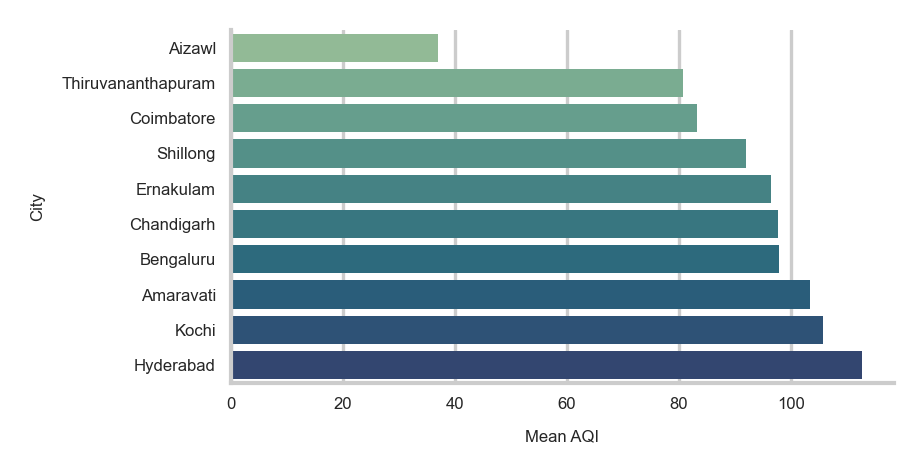

In [11]:
#Grouping the AQI by city and calculating the average AQI per city

x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI').head(10))
x=x.reset_index('City')

#plotting the average AQI per city

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='AQI',y='City',orient='h',palette='crest')
plt.xlabel('Mean AQI')

### Through the above graph, we can see that among the top 10 least polluted cities based on Mean AQI, the mean AQI of the top 7 cities with cleanest air (Aizawl, Thiruvanthapuram, Coimbatore, Shillong, Ernakulam, Chandigarh, and Bengaluru) is below 100. This places those cities in the 'Satisfactory' air quality category where only sensitive people are prone to experiencing a minor level of discomfort breathing.
#### 

# Top 10 most Polluted Cities in India (by mean AQI levels)

Text(0.5, 0, 'Mean AQI')

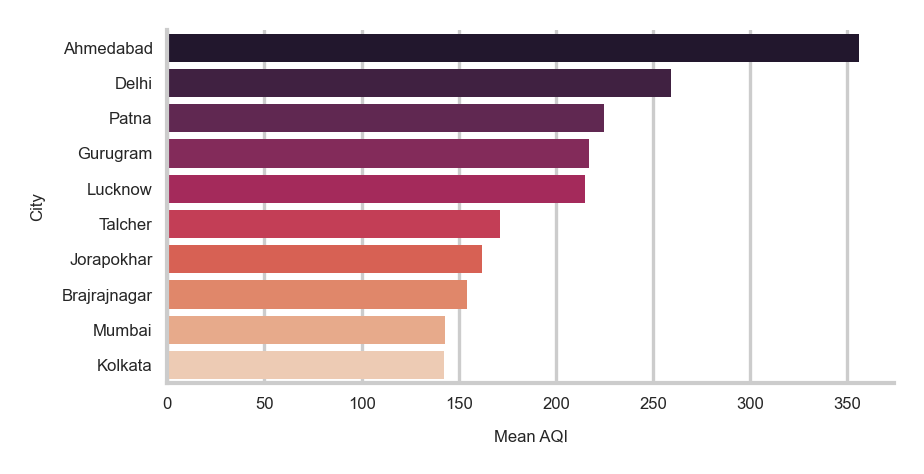

In [12]:
#Grouping the AQI by city and calculating the average AQI per city

x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='AQI',y='City',orient='h',palette='rocket')
plt.xlabel('Mean AQI')

### Through the above graph, we can see that among the top 10 most polluted cities based on Mean AQI, the mean AQI of the top 5 cities (Ahmedabad, Delhi, Patna, Gurugram, and Lucknow) is above 200. This places those cities in the 'Poor' category on the AQI scale where the health risks would be breathing discomfort and development of breathing problems in most people on prolonged exposure.
#### 

# Change in the concentration of individual Particulate matter over the years

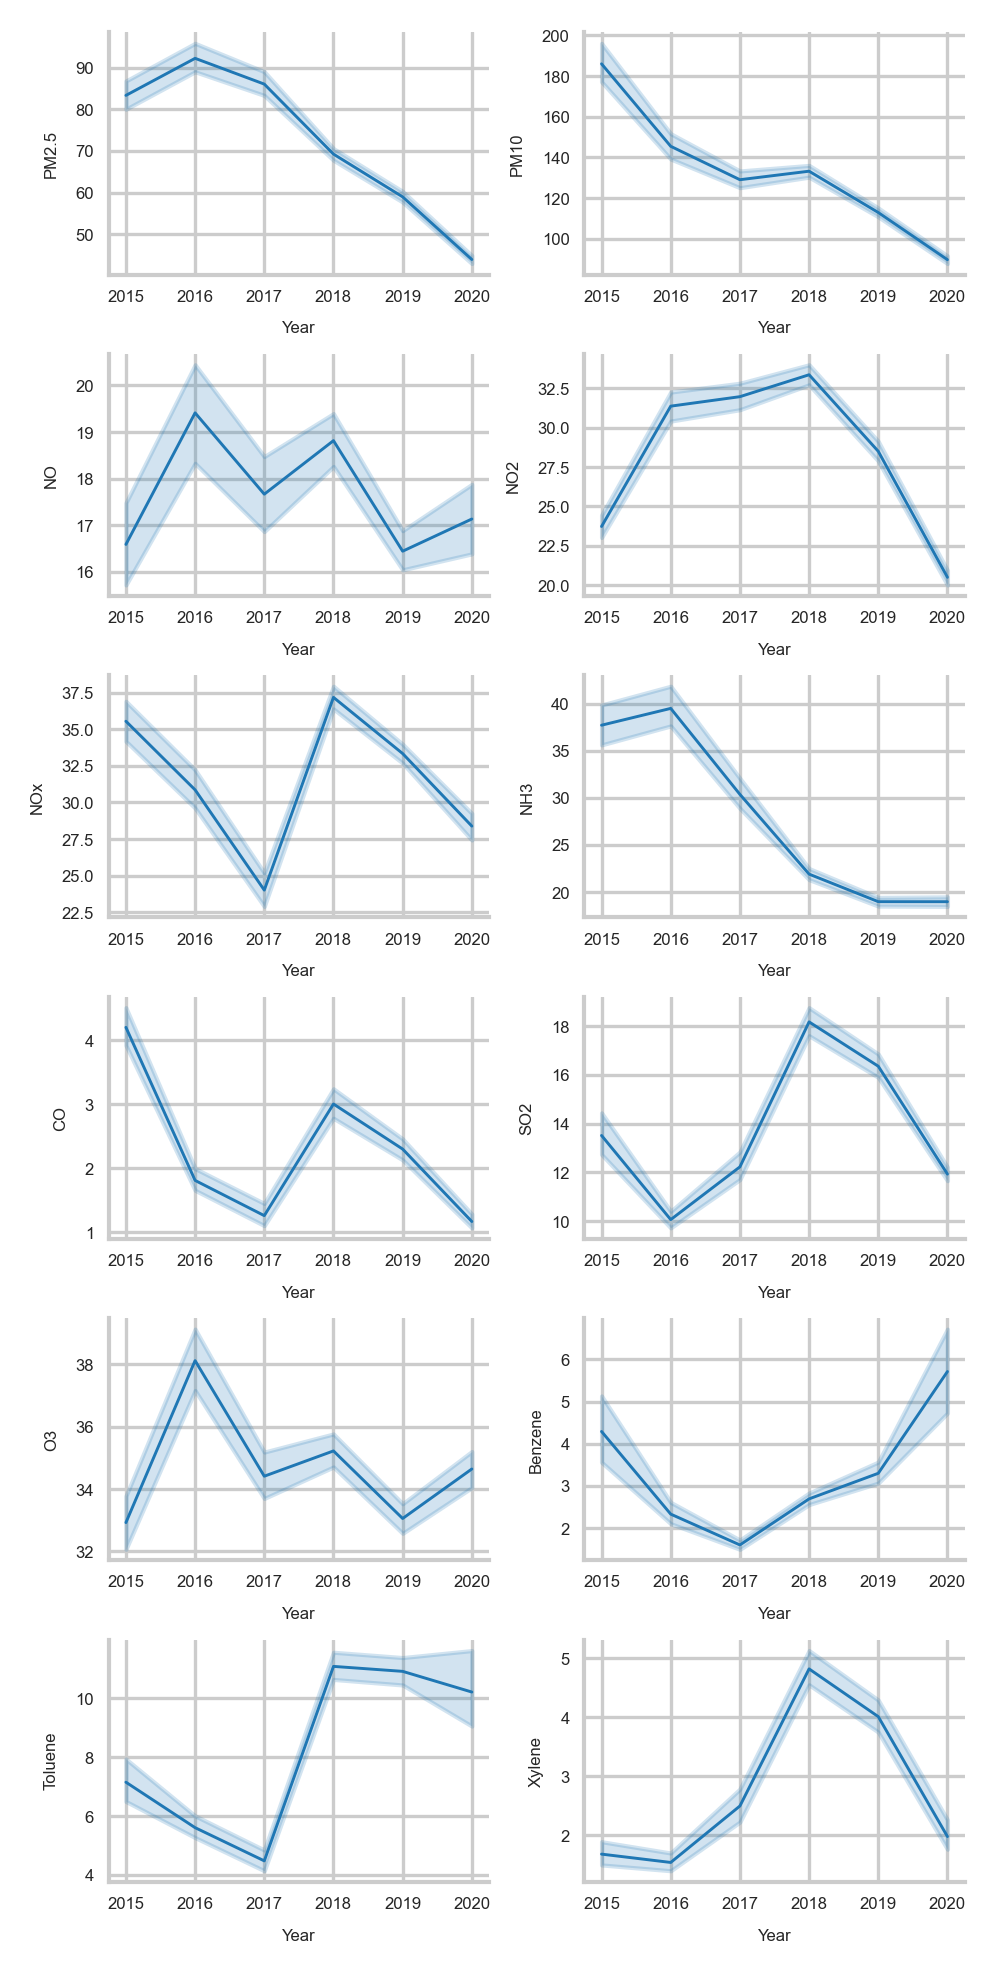

In [13]:
# Segregating the date into Month and Year and forming new columns in the dataframe

df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)


# Visualizing change in amount of particulate matter and gases over the years

cols=['PM2.5','PM10','NO','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

x=df.iloc[:,2:]
fig=plt.figure(figsize=(3.2,6.5))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='Year',y=col,data=x)

### Of these 12 types of particulate matters, 7 types of particulate matter primarily arise from Vehicular pollution and the other 5 types of particulate matter primarily arise from Industrial pollution.

### Vehicular pollution particulate matter - 'PM2.5','PM10','NO','NO2','NOx','NH3','CO'
### Industrial pollution particulate matter - 'SO2','O3','Benzene','Toluene','Xylene'

### We can see that from 2015 to 2020, the amount of particulates relating to vehicular pollution have gone down. However, when we look at the amount of particulates related to industrial pollution, we can see that the amount of Benzene and Toluene in the air has shot up. We need to investigate the reason for this increase.
#### 

# Change in mean AQIs of top 5 polluted cities from 2015 to 2020

In [14]:
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,NaN,1,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,NaN,1,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,NaN,1,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,NaN,1,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,NaN,1,2015
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,166.463581,NaN,1,2015
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,166.463581,NaN,1,2015
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,166.463581,NaN,1,2015
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,166.463581,NaN,1,2015
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,166.463581,NaN,1,2015


In [15]:
#Grouping the AQI by year and calculating the average AQI per year

x=pd.DataFrame(df.groupby(['City','Year'])[['AQI']].mean().sort_values(by=['City','Year']))
x=x.reset_index(['City','Year'])

In [16]:
x.head(20)

,City,Year,AQI
0,Ahmedabad,2015,270.573384
1,Ahmedabad,2016,212.400087
2,Ahmedabad,2017,240.625261
3,Ahmedabad,2018,612.273174
4,Ahmedabad,2019,503.890484
5,Ahmedabad,2020,239.176203
6,Aizawl,2020,37.096701
7,Amaravati,2017,191.827989
8,Amaravati,2018,110.839917
9,Amaravati,2019,108.914960


Text(0.5, 0, 'AQI of Ahmedabad over the years')

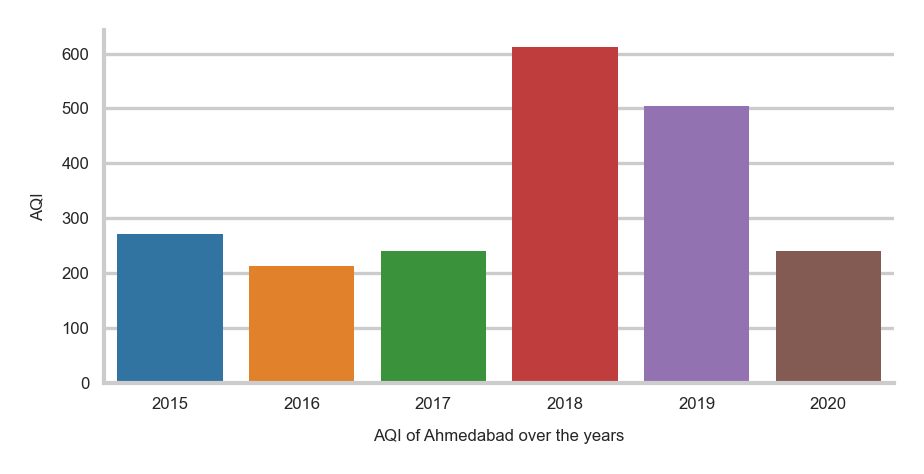

In [17]:
# Plotting the average AQI of Ahmedabad over the years

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x[x['City'] == 'Ahmedabad'],y='AQI',x='Year',orient = 'v')
plt.xlabel('AQI of Ahmedabad over the years')

Text(0.5, 0, 'AQI of Delhi over the years')

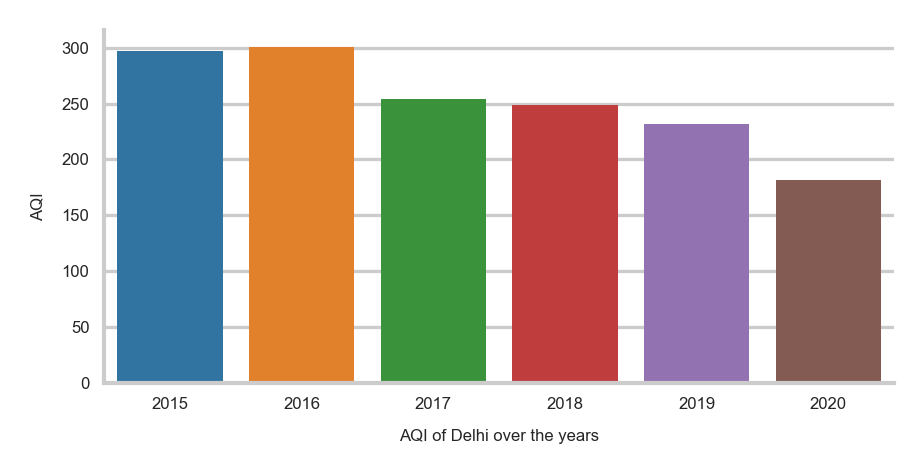

In [18]:
# Plotting the average AQI of Ahmedabad over the years

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x[x['City'] == 'Delhi'],y='AQI',x='Year',orient = 'v')
plt.xlabel('AQI of Delhi over the years')

Text(0.5, 0, 'AQI of Patna over the years')

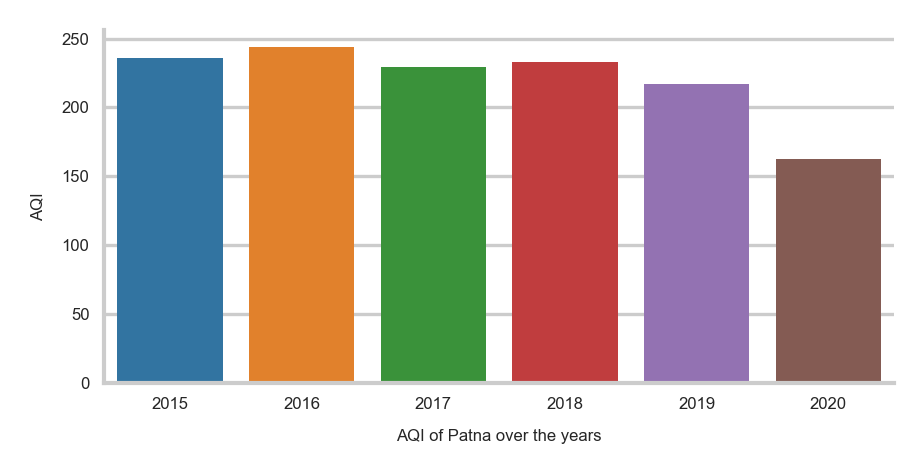

In [19]:
# Plotting the average AQI of Ahmedabad over the years

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x[x['City'] == 'Patna'],y='AQI',x='Year',orient = 'v')
plt.xlabel('AQI of Patna over the years')

Text(0.5, 0, 'AQI of Gurugram over the years')

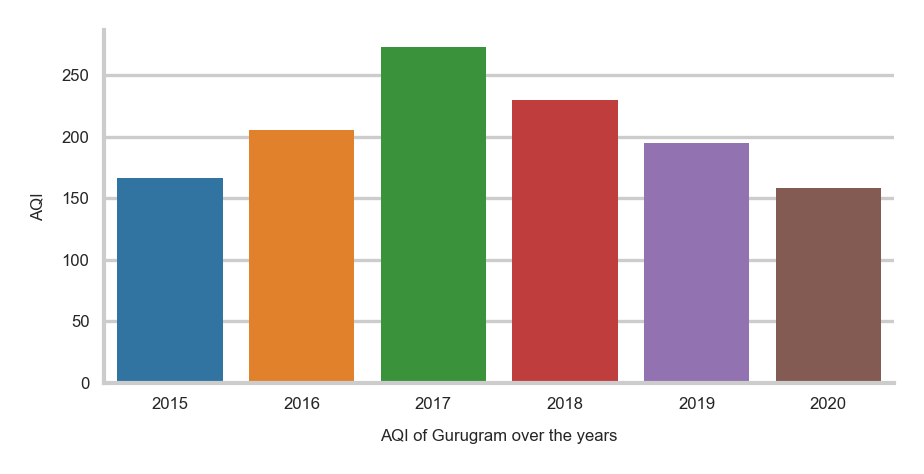

In [20]:
# Plotting the average AQI of Ahmedabad over the years

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x[x['City'] == 'Gurugram'],y='AQI',x='Year',orient = 'v')
plt.xlabel('AQI of Gurugram over the years')

Text(0.5, 0, 'AQI of Lucknow over the years')

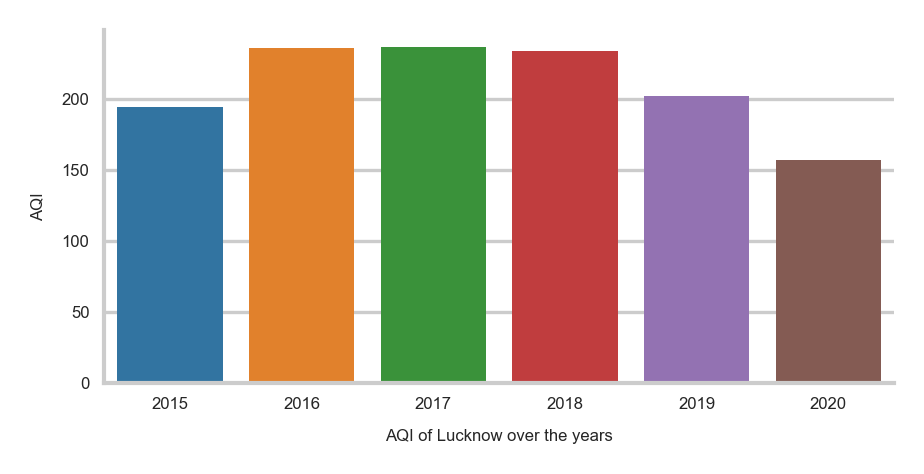

In [21]:
# Plotting the average AQI of Ahmedabad over the years

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x[x['City'] == 'Lucknow'],y='AQI',x='Year',orient = 'v')
plt.xlabel('AQI of Lucknow over the years')

# Correlation between the different pollutant matter

Text(0.5, 1.0, 'Correlation Analysis')

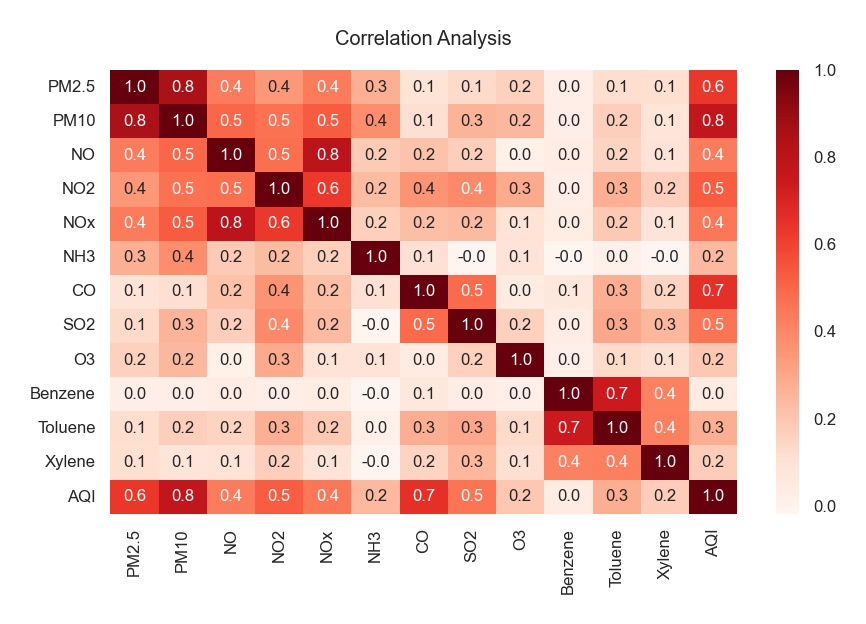

In [22]:
#correlation analysis

plt.figure(figsize=(3,2))

sns.heatmap(df.corr(method='pearson'),
            annot=True,fmt='0.1f',
            robust=True,
            cmap='Reds')
plt.title('Correlation Analysis')

### There is very little correlation observed among the amounts of the different particulate matter. Looking at the correlation of different particulate matters to the AQI column, we can see that PM10, CO, and PM2.5 seem to have some amount of correlation with the AQI scores. We could make a conclusion then that PM10, CO, and PM2.5 have a higher weightage in calculating the final AQI score.
### 

# Cities that enjoy the most number of clean days

<AxesSubplot:xlabel='Percentage of Days the AQI level was below 100'>

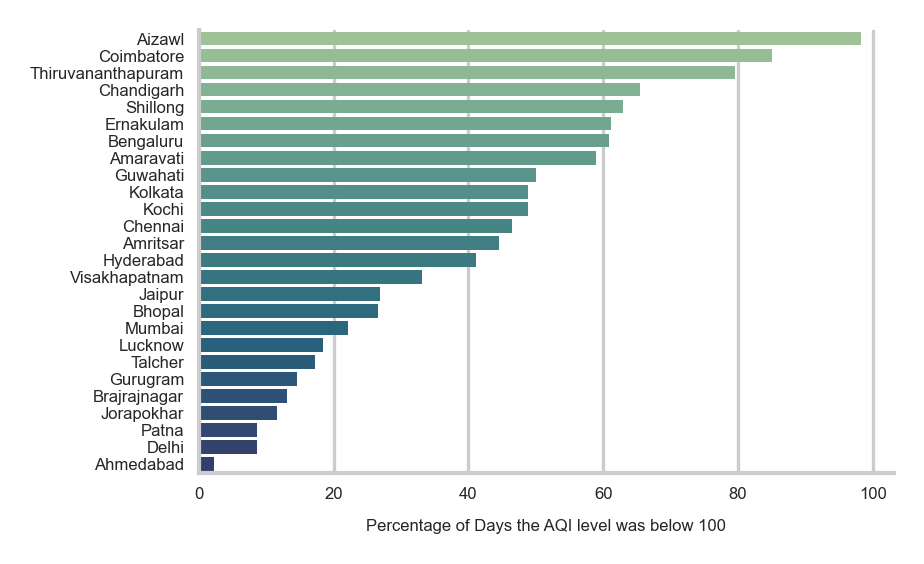

In [23]:
x=pd.DataFrame(df['City'][df['AQI']< 100].value_counts())/pd.DataFrame(df['City'].value_counts())*100
x=x.rename(columns={'City':'Percentage of Days the AQI level was below 100'})
x.sort_values(by='Percentage of Days the AQI level was below 100', ascending=False, inplace = True)

plt.figure(figsize=(3,1.8))
sns.barplot(x='Percentage of Days the AQI level was below 100',y=x.index,data=x,palette='crest')

### Of the 26 cities mentioned in the dataset, 11 cities enjoy at least a 'Satisfactory' level of Air Quality on almost 50% of the days. The top 5 cleanest cities would be Aizawl, Coimbatore, Thiruvananthapuram, Chandigarh, and Shillong.

# Identifying if there is a change in the Mean AQI levels of Most Polluted cities in Pre-Covid time (Apr 2019 - Jun 2019) to Post-Covid time (Apr 2020 - Jun 2020)

In [24]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,NaN,1,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,NaN,1,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,NaN,1,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,NaN,1,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,NaN,1,2015


In [53]:
city_select = 'Delhi'

Text(0.5, 0, 'AQI of Delhi in 2019 (Pre-Covid)')

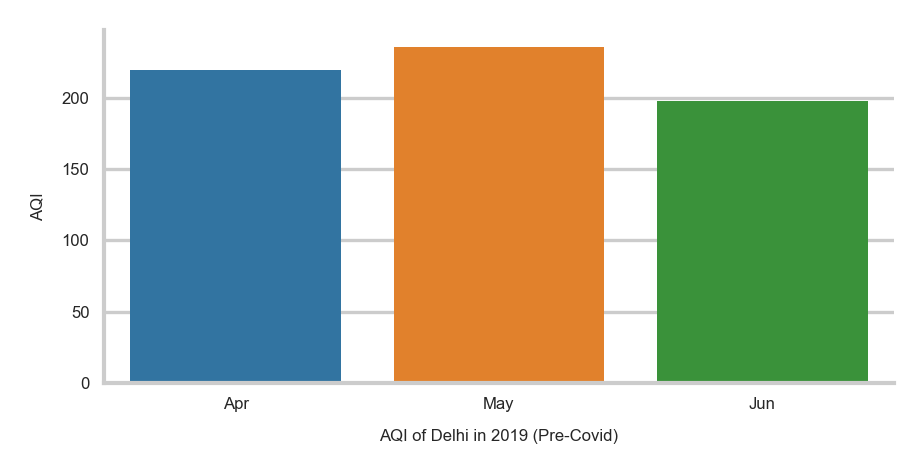

In [26]:
df_cs_19 = df[(df['City']==city_select) & (df['Month'].isin(['4','5','6'])) & (df['Year'] == '2019')]


#Grouping the AQI by month and calculating the average AQI per month

x_19=pd.DataFrame(df_cs_19.groupby(['Month'])[['AQI']].mean().sort_values(by=['Month']))
x_19=x_19.reset_index(['Month'])
x_19 = x_19.replace(['4','5','6'],['Apr','May','Jun'])


# Plotting the average AQI of Ahmedabad over the months of 2019

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x_19,y='AQI',x='Month',orient = 'v')
plt.xlabel('AQI of ' + city_select + ' in 2019 (Pre-Covid)')

Text(0.5, 0, 'AQI of Delhi in 2020 (Post-Covid)')

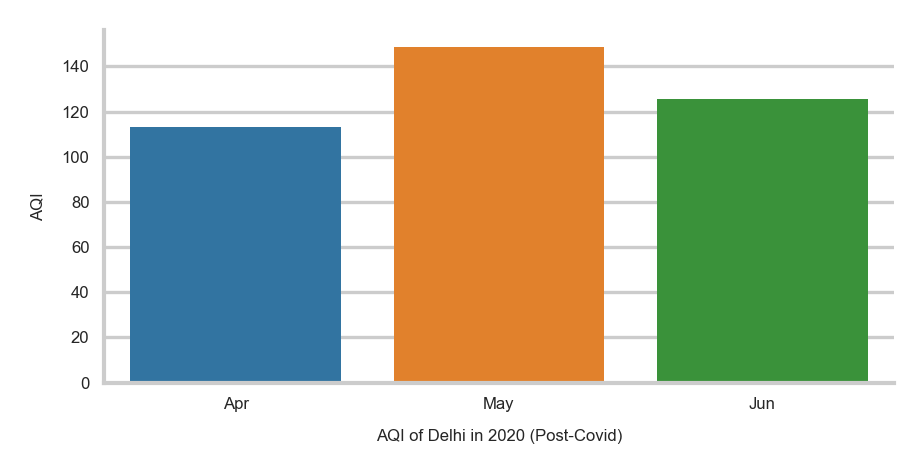

In [27]:
df_cs_20 = df[(df['City']==city_select) & (df['Month'].isin(['4','5','6'])) & (df['Year'] == '2020')]

#Grouping the AQI by month and calculating the average AQI per month

x_20=pd.DataFrame(df_cs_20.groupby(['Month'])[['AQI']].mean().sort_values(by=['Month']))
x_20=x_20.reset_index(['Month'])
x_20 = x_20.replace(['4','5','6'],['Apr','May','Jun'])

# Plotting the average AQI of Ahmedabad over the months of 2019

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x_20,y='AQI',x='Month',orient = 'v')
plt.xlabel('AQI of ' + city_select + ' in 2020 (Post-Covid)')

C:\Users\Ishan\AppData\Local\Temp/ipykernel_22496/716867412.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  splot1.set_yticklabels(splot1.get_yticks().round(decimals=0), size=13)
C:\Users\Ishan\AppData\Local\Temp/ipykernel_22496/716867412.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  splot2.set_yticklabels(splot2.get_yticks().round(decimals=0), size=13)


[Text(0, 0.0, '0.0'),
 Text(0, 20.0, '20.0'),
 Text(0, 40.0, '40.0'),
 Text(0, 60.0, '60.0'),
 Text(0, 80.0, '80.0'),
 Text(0, 100.0, '100.0'),
 Text(0, 120.0, '120.0'),
 Text(0, 140.0, '140.0')]

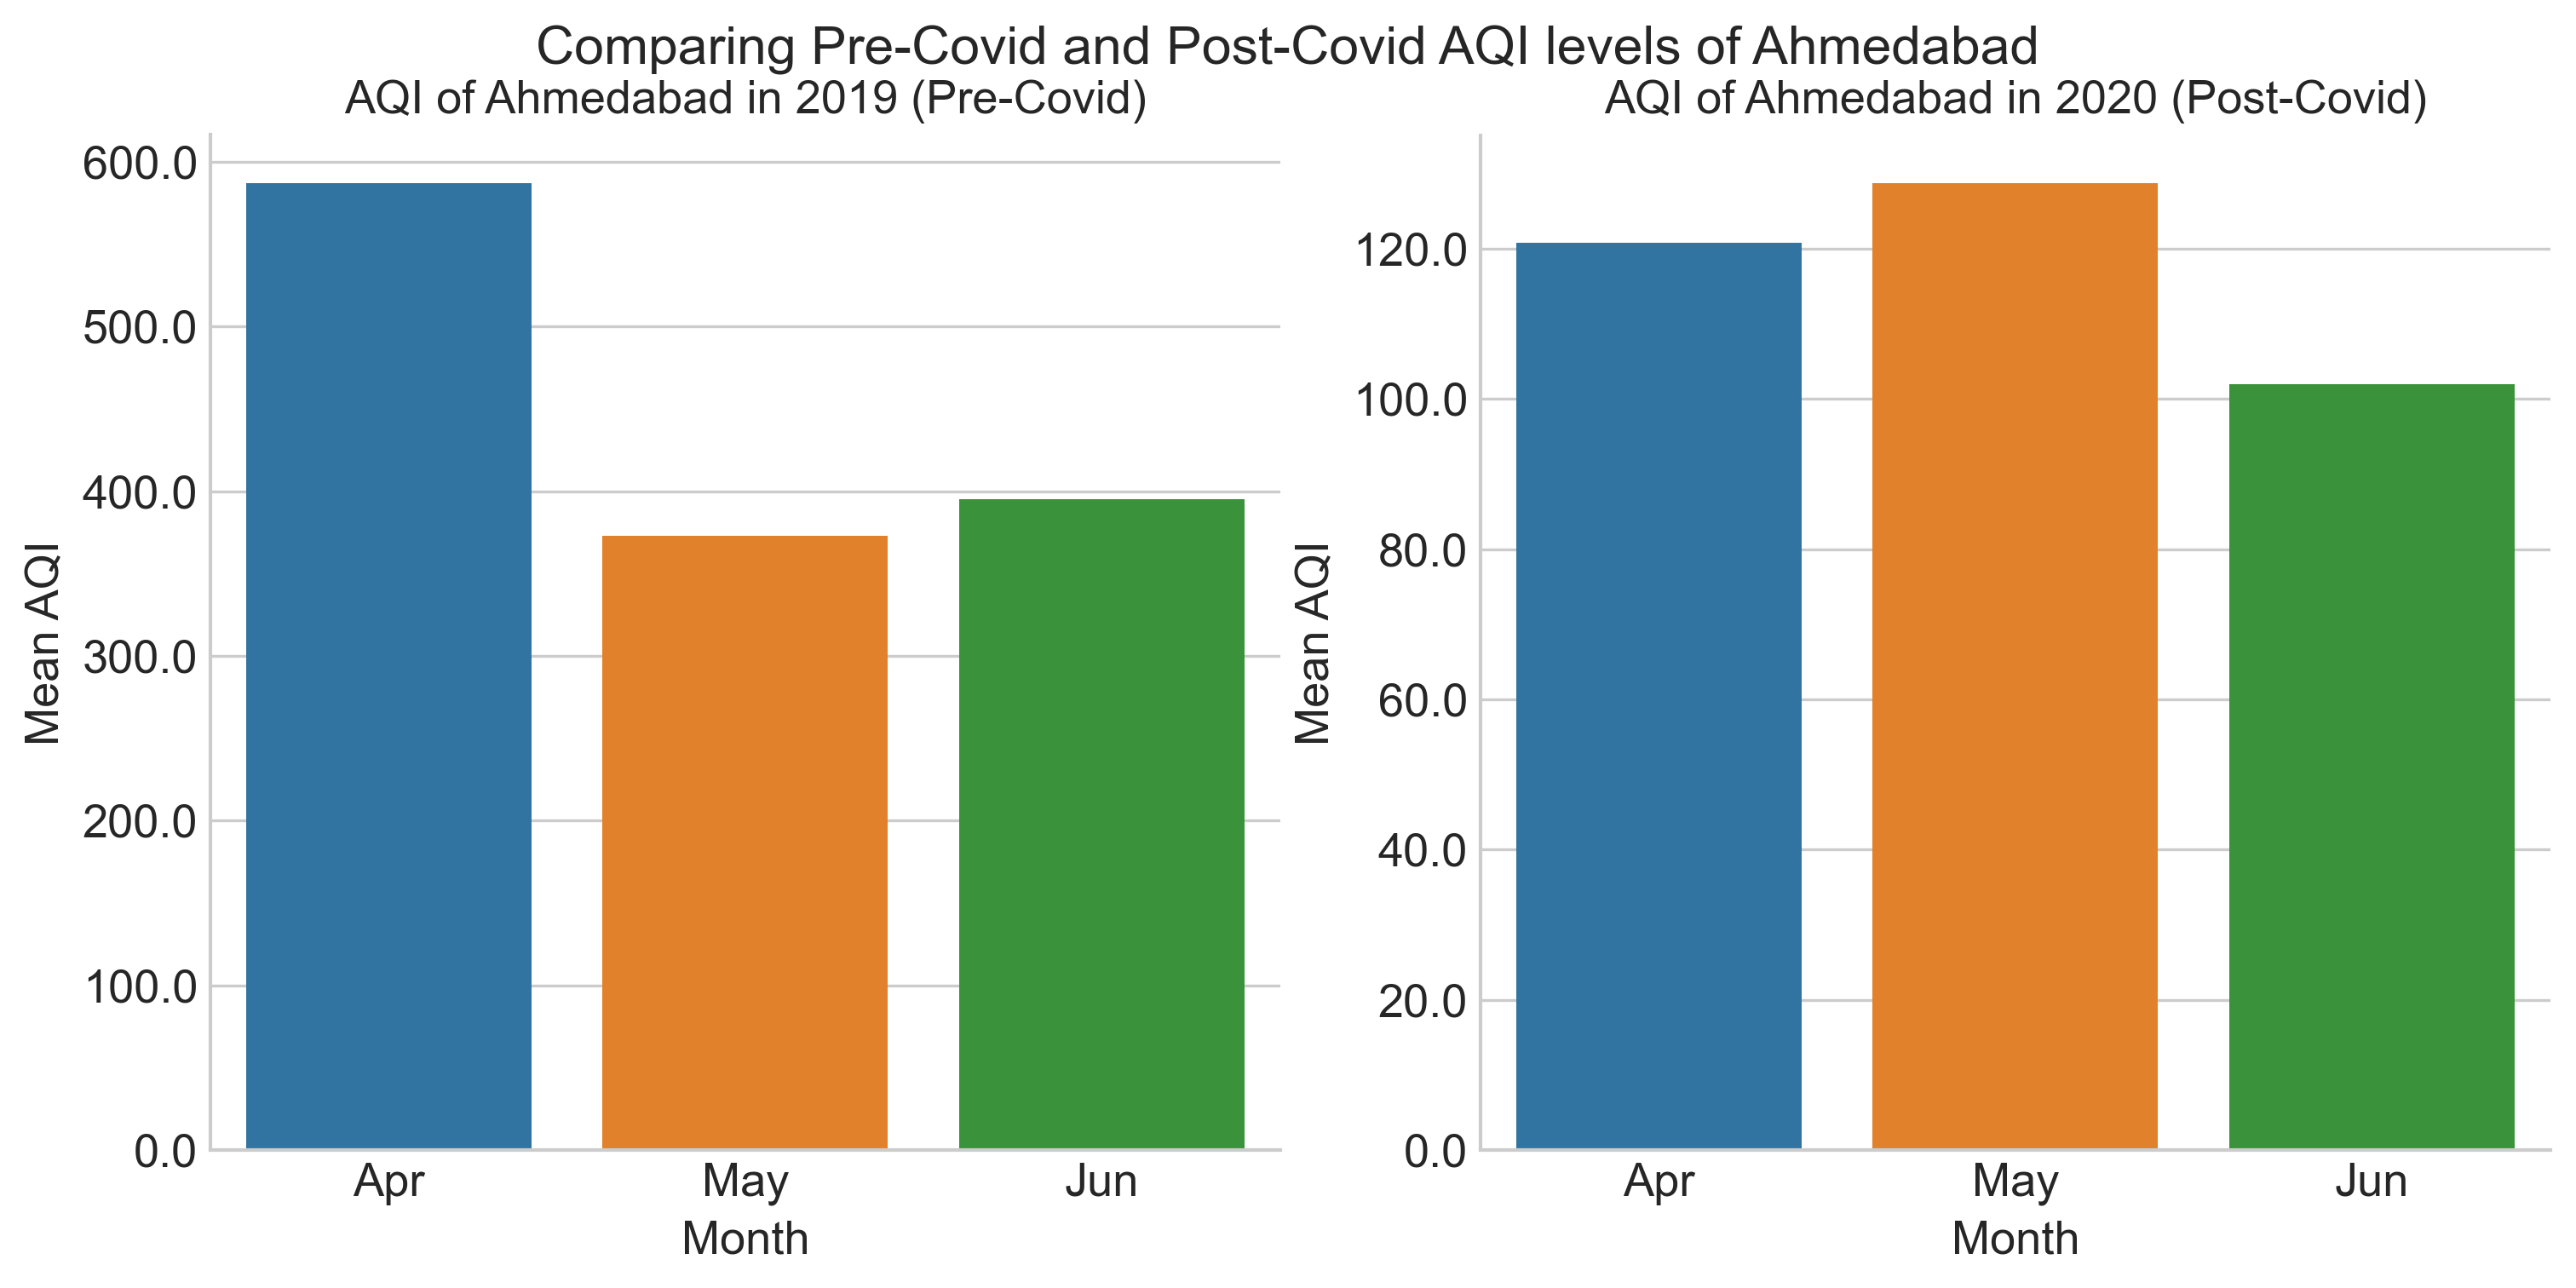

In [60]:
city_select = 'Ahmedabad'

df_cs_19 = df[(df['City']==city_select) & (df['Month'].isin(['4','5','6'])) & (df['Year'] == '2019')]
#Grouping the AQI by month and calculating the average AQI per month
x_19=pd.DataFrame(df_cs_19.groupby(['Month'])[['AQI']].mean().sort_values(by=['Month']))
x_19=x_19.reset_index(['Month'])
x_19 = x_19.replace(['4','5','6'],['Apr','May','Jun'])


df_cs_20 = df[(df['City']==city_select) & (df['Month'].isin(['4','5','6'])) & (df['Year'] == '2020')]
#Grouping the AQI by month and calculating the average AQI per month
x_20=pd.DataFrame(df_cs_20.groupby(['Month'])[['AQI']].mean().sort_values(by=['Month']))
x_20=x_20.reset_index(['Month'])
x_20 = x_20.replace(['4','5','6'],['Apr','May','Jun'])



fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Comparing Pre-Covid and Post-Covid AQI levels of {}'.format(city_select),size=15)

axes[0].set_title('AQI of ' + city_select + ' in 2019 (Pre-Covid)',size=13)
splot1 = sns.barplot(ax=axes[0], data=x_19,y='AQI',x='Month',orient = 'v')
splot1.set_xlabel('Month',size=13)
splot1.set_ylabel('Mean AQI',size=13)
splot1.set_xticklabels(['Apr','May','Jun'],size=13)
splot1.set_yticklabels(splot1.get_yticks().round(decimals=0), size=13)

axes[1].set_title('AQI of ' + city_select + ' in 2020 (Post-Covid)',size=13)
splot2 = sns.barplot(ax=axes[1], data=x_20,y='AQI',x='Month',orient = 'v')
splot2.set_xlabel('Month',size=13)
splot2.set_ylabel('Mean AQI',size=13)
splot2.set_xticklabels(['Apr','May','Jun'],size=13)
splot2.set_yticklabels(splot2.get_yticks().round(decimals=0), size=13)

In [52]:
splot1.get_yticks().round(decimals=0)

array([  0.,  50., 100., 150., 200., 250.])